# Assignment 3 (Fourier Transform)

In [108]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from scipy.signal import convolve2d 
import time
%matplotlib inline 

# Question 1 FFT

In [2]:
# Load the image
im = Image.open('barbara.jpg').convert('L')
img = np.array(im)

In [10]:
def display_2_images(a,b,b_title):
    fig = plt.figure(figsize=(16,16))
    ax1 = fig.add_subplot(121)
    ax1.imshow(a, cmap = 'gray')
    ax1.set_title('Input Image')
    ax1.axis('off')
    
    ax2 = fig.add_subplot(122)
    ax2.imshow(b, cmap = 'gray')
    ax2.set_title(b_title)
    ax2.axis('off')
    plt.show()

## Part 1

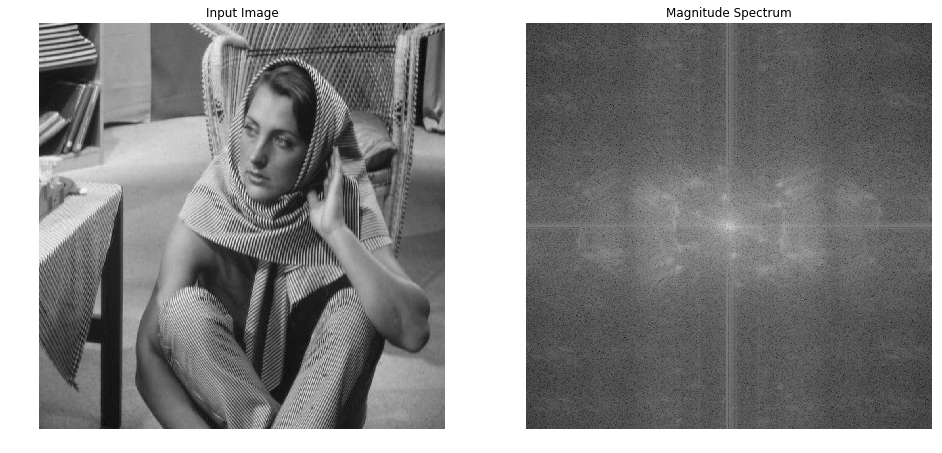

In [11]:
# Take 2d fft
f = np.fft.fft2(img)
# Apply fft shift for visualization
fshift = np.fft.fftshift(f)
# We are only checking the magnitude 
# We use log as transformation, hence values should be > 1
magnitude_spectrum = np.log(np.abs(fshift) +1)

# Plot image and fft
display_2_images(img,magnitude_spectrum,'Magnitude Spectrum')

## Part 2

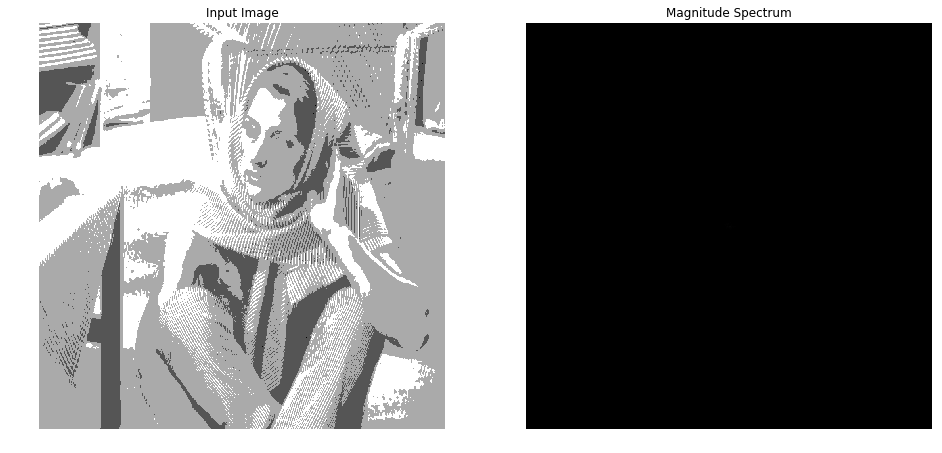

In [12]:
new_img = np.log(img + 1).astype(int)
# Take log followed by 2d fft 
f = np.fft.fft2(new_img)
# Apply fft shift for visualization
fshift = np.fft.fftshift(f)
# We are only checking the magnitude 
# We use log as transformation
magnitude_spectrum = np.abs(fshift)

# Plot image and fft
display_2_images(new_img,magnitude_spectrum,'Magnitude Spectrum')

# Part 3

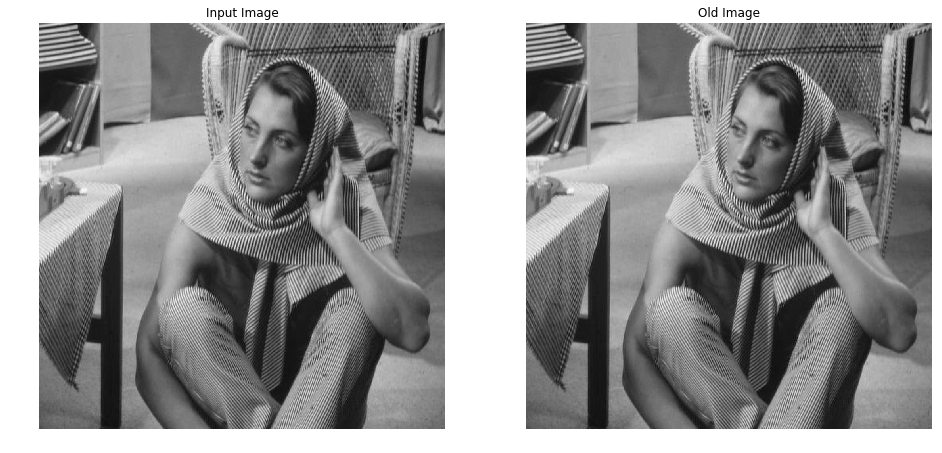

0


In [114]:
# Take 2d fft and take the conjugate to correct the image
f = np.fft.fft2(img)
f = np.conjugate(f)
f = np.fft.fft2(f)

old_image = np.real(f)

# Plot image and fft
display_2_images(img,old_image,'Old Image')
print(np.imag(1))

# Question 2
![q2_ques.png](./q2_ques.png)
![q2_ans.jpeg](./q2_ans.jpeg)

# Question 3

In [69]:
# Load image
im = Image.open('barbara.jpg').convert('L')
im = im.resize((64,64))
im = np.array(im)
im.shape

(64, 64)

In [70]:
def add_zeros(im):
    h,w = im.shape
    new_img = np.zeros((2*h,2*w))
    new_img[0:h,0:w] = im
    return new_img

def get_fft_img(img):
    # Take 2d fft
    f = np.fft.fft2(img)
    # Apply fft shift for visualization
    fshift = np.fft.fftshift(f)
    # We are only checking the magnitude 
    # We use log as transformation, hence values should be > 1
    magnitude_spectrum = np.log(np.abs(fshift) +1)
    return magnitude_spectrum

def get_ifft_img(img):
    # Take 2d fft
    f = np.fft.ifft2(img)
    # Apply fft shift for visualization
    fshift = np.fft.ifftshift(f)
    # We are only checking the magnitude 
    # We use log as transformation, hence values should be > 1
    magnitude_spectrum = np.log(np.abs(fshift) +1)
    return magnitude_spectrum

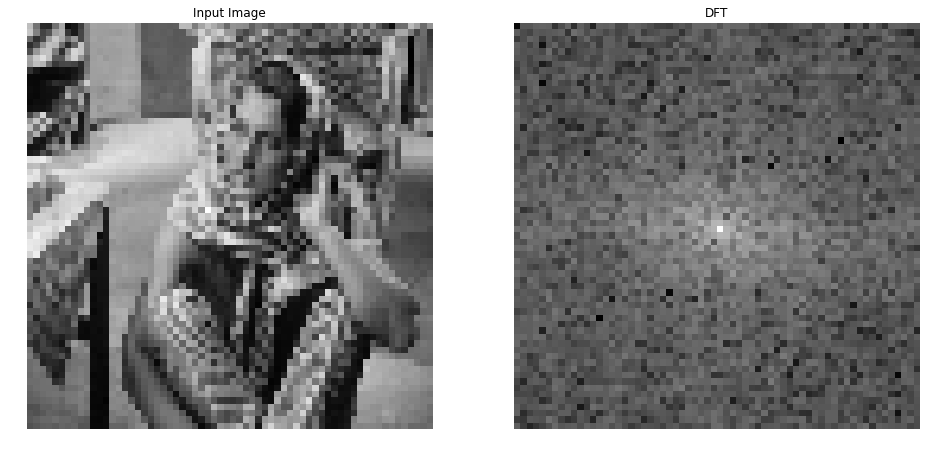

In [71]:
# 64x64
f_im = get_fft_img(im)
display_2_images(im,f_im,'DFT')

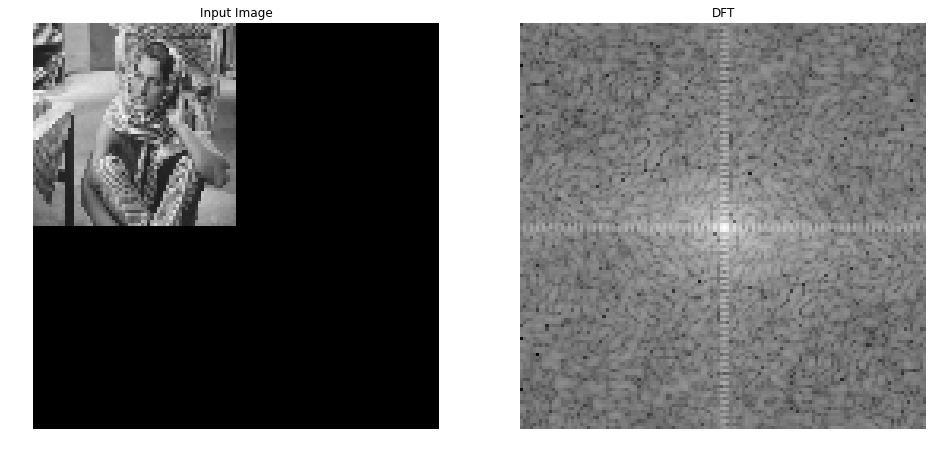

In [72]:
#128x128
im = add_zeros(im)
f_im = get_fft_img(im)
display_2_images(im,f_im,'DFT')

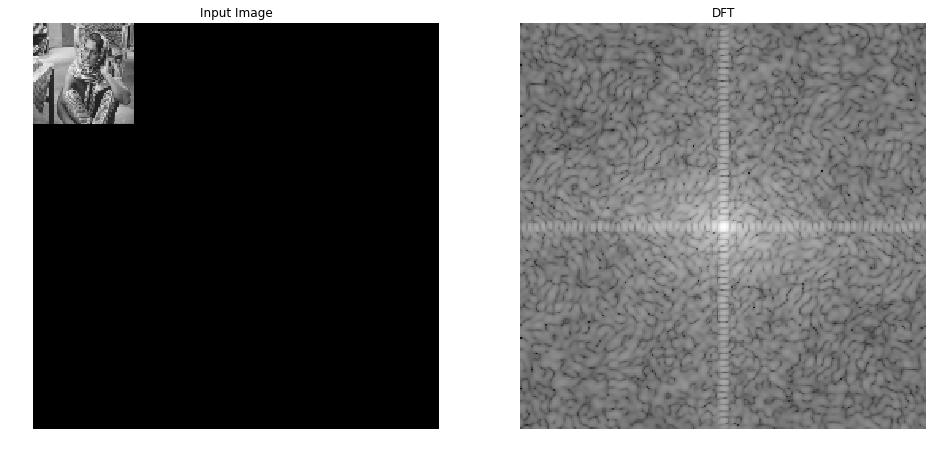

In [73]:
#256x256
im = add_zeros(im)
f_im = get_fft_img(im)
display_2_images(im,f_im,'DFT')

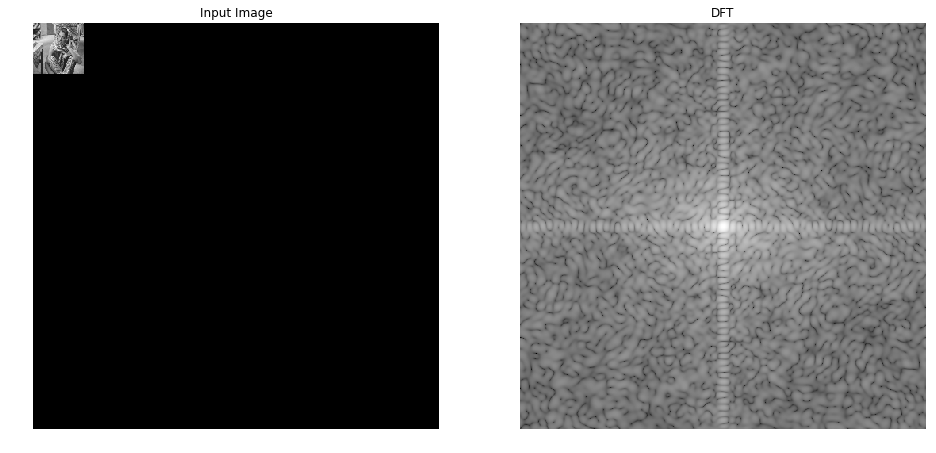

In [74]:
#512x512
im = add_zeros(im)
f_im = get_fft_img(im)
display_2_images(im,f_im,'DFT')

# Relations betweeen images 
DFT of each image is almost the same, except we have a change in the dimensions. This is interesting as we we can conclude that adding zeros in image has resulted in no change in the fft. 
## Reason 1 
    If we see the eqauation of fourier trasnform, 0 values have no contribuition to Fourier Transform 
## Reason 2
    FFT does not depend on the scale and translation in the image, it only depends on the frequency of change in pixels, this does not depend on the zero values. They will only increase the dc term

# Question 4

## Part 1

In [ ]:
f = Image.open('barbara.jpg').convert('L')
f = np.array(f.resize((256,256)))
F = np.fft.fft2(f)
display_2_images(f,np.log(1 + np.abs(F)),'DFT')
h = Image.open('checkerboard6qi.png').convert('L')
h = np.array(h.resize((256,256)))
H = np.fft.fft2(h)
display_2_images(h,np.log(1+np.abs(H)),'DFT')


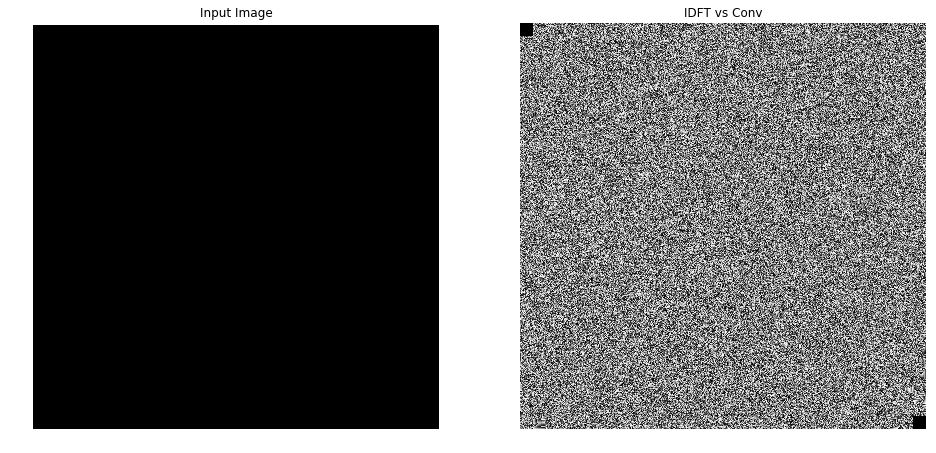

In [98]:
im = np.fft.ifft(np.multiply(F,H))
con = signal.convolve2d(f,h)
display_2_images(np.abs(im),np.abs(con),'IDFT vs Conv')

In [100]:
# Calculate the error
mid = 511//2
error_im = im/256 - con[mid-128:mid+128,mid-128:mid+128]/256
error = np.sum(np.square(np.abs(error_im)))
print(error)

2.3200272970826626e+20


# Part 2

In [ ]:
h_f, w_f =  f.shape
h_h, w_h = h.shape
conv_fh = signal.convolve2d(f,h)
ff_conv = np.fft.fft2(conv_fh)
ff_conv = np.absolute(ff_conv)

plt.title("fft(Convolved images)")
plt.imshow(np.log(1 + np.abs(ff_conv)), cmap = cm.gray)
plt.show()
f_pad = np.pad(f, [(0,h_h-1), (0,w_h-1)], mode='constant', constant_values=0)
h_pad = np.pad(h, [(0,h_f-1), (0,w_f-1)], mode='constant', constant_values=0)
F = np.fft.fft2(f_pad)
H = np.fft.fft2(h_pad)

mul_FH = np.multiply(F,H)
plt.title("fft(img1) .* fft(img2)")
plt.imshow(np.log(1 + np.abs(mul_FH)), cmap = cm.gray)
plt.show()
mul_abs = np.absolute(mul_FH)

error = np.sum((mul_abs - ff_conv)**2)
error = error/((h_h + h_f - 1) * (w_h + w_f - 1))
print(error)

# Part 3

* fft is faster for bigger images as compared to convolution
* As the size of image increases the difference between times of fft and convolution increases.

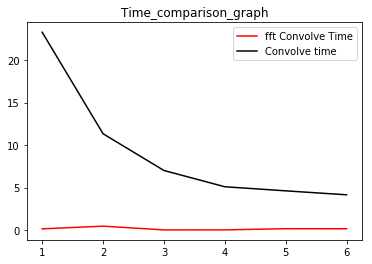

In [103]:
def conv_time(f, h):
    convolve_time = []
    fft_convolve_time = []
    for i in range(6):
        h_f, w_f =  f.shape
        h_h, w_h = h.shape
        t1 = time.time()
        conv_fh = signal.convolve2d(f,h)
        t2 = time.time()
        convolve_time.append(t2 - t1)

        t1 = time.time()
        f_pad = np.pad(f, [(0,h_h-1), (0,w_h-1)], 'constant')
        h_pad = np.pad(h, [(0,h_f-1), (0,w_f-1)], 'constant')

        F = np.fft.fft2(f_pad)
        H = np.fft.fft2(h_pad)
        mul_FH = F*H
        out = np.fft.ifft2(mul_FH)
        t2 = time.time()
        fft_convolve_time.append(t2 - t1)
        f = np.array(Image.fromarray(f).resize((h_f//2,w_f//2)))
    
    x = range(1,7)
    plt.figure()
    ax = plt.subplot(1,1,1)
    plt.plot(x, convolve_time, color="black", label="Convolve time")
    plt.plot(x, fft_convolve_time, color="red", label="fft Convolve Time")
    plt.title("Time_comparison_graph")
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles[::-1], labels[::-1])
    plt.show()
    
conv_time(f,h)    

# Part 4

In [104]:
def find_convolution(img1, img2, check=1):
    h1, w1 = img1.shape
    h2, w2 = img2.shape
    t1 = time.time()
    if check is 1:
        img1_pad = np.pad(img1, [(0,h2-1), (0,w2-1)], 'constant')
        img2_pad = np.pad(img2, [(0,h1-1), (0,w1-1)], 'constant')
    elif check is 0:
        img1_pad = np.pad(img1, [(0,h2), (0,w2)], 'constant')
        img2_pad = np.pad(img2, [(0,h1), (0,w1)], 'constant')        
    F = np.fft.fft2(img1_pad)
    H = np.fft.fft2(img2_pad)
    mul_FH = F*H
    out = np.fft.ifft2(mul_FH)
    t2 = time.time()
    return out, t2 - t1

In [109]:
out, time1 = find_convolution(f,h)
print(time1)

0.13889837265014648


In [110]:
out2, time2 = find_convolution(f,h,0)
print("Last Row Mean " + str(np.mean(np.abs(out2[-1,:]))))
print("Last Column Mean", np.mean(np.abs(out2[:,-1])))
print(time2)

Last Row Mean 5.19450674998969e-08
Last Column Mean 5.02511864816702e-08
0.03189253807067871


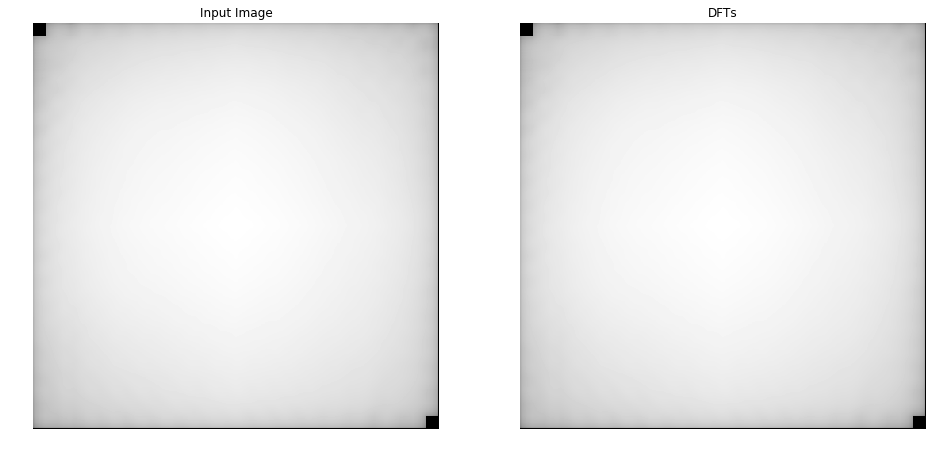

In [112]:
display_2_images(np.log(1+np.abs(out2)),np.log(1+np.abs(out2)),'DFTs')

# Question 5

In [58]:
# Load the image
im = Image.open('checkerboard6qi.png').convert('L')
im = np.array(im)

In [59]:
def sample_image(im,nx,ny):
    h,w = im.shape
    new_im  = []
    for i in range(h):
        if i%ny == 0:
            row = []
            for j in range(w):
                if j%nx == 0:
                    row.append(im[i][j])
            new_im.append(row)
    return np.array(new_im).astype(int)

nx:1 ny:1


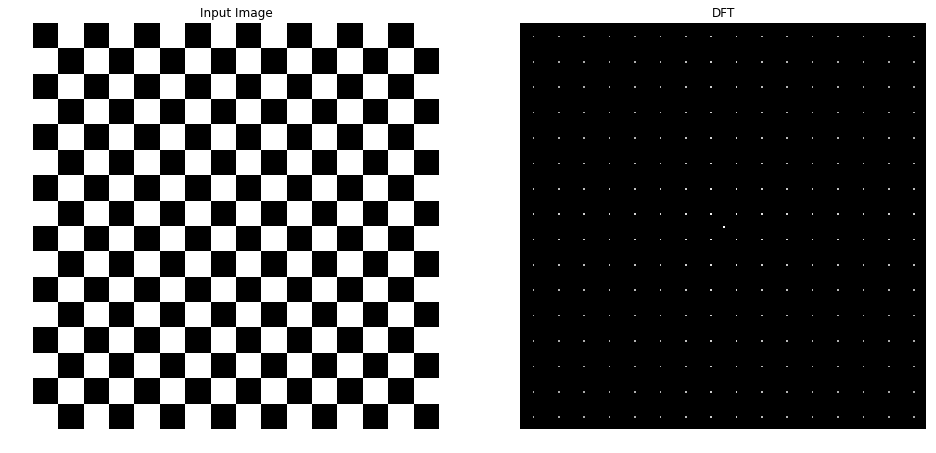

nx:2 ny:2


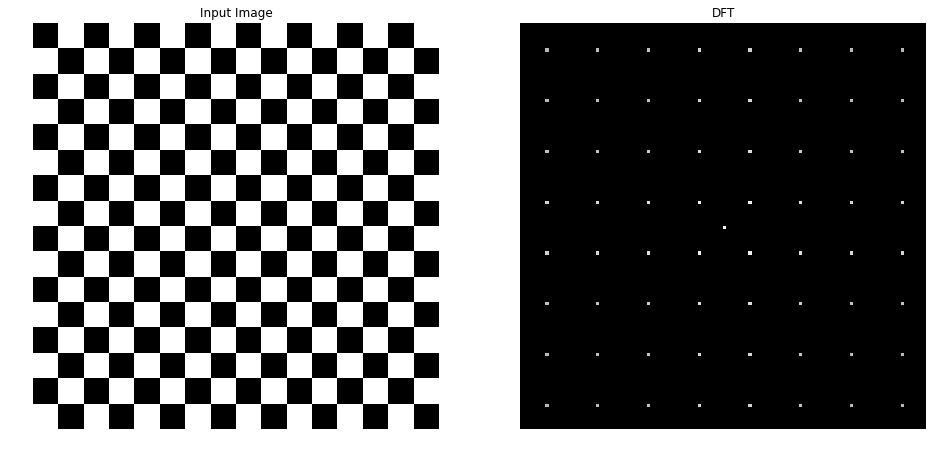

nx:3 ny:3


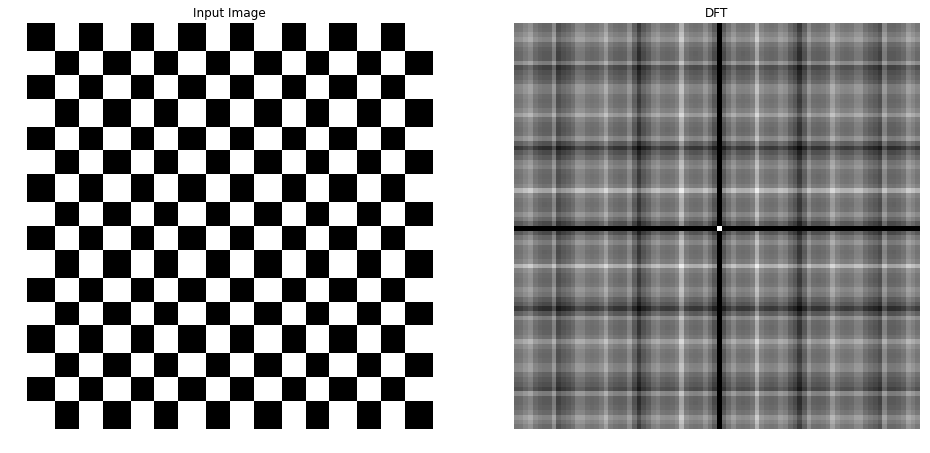

nx:4 ny:4


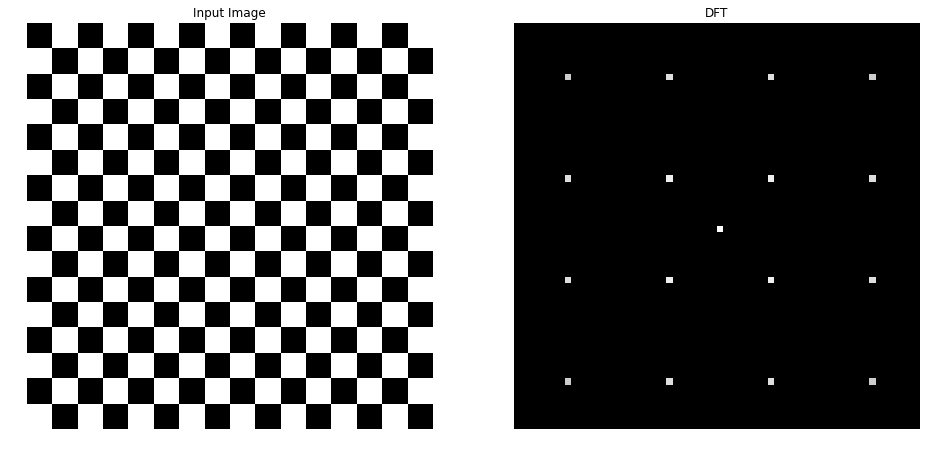

nx:5 ny:5


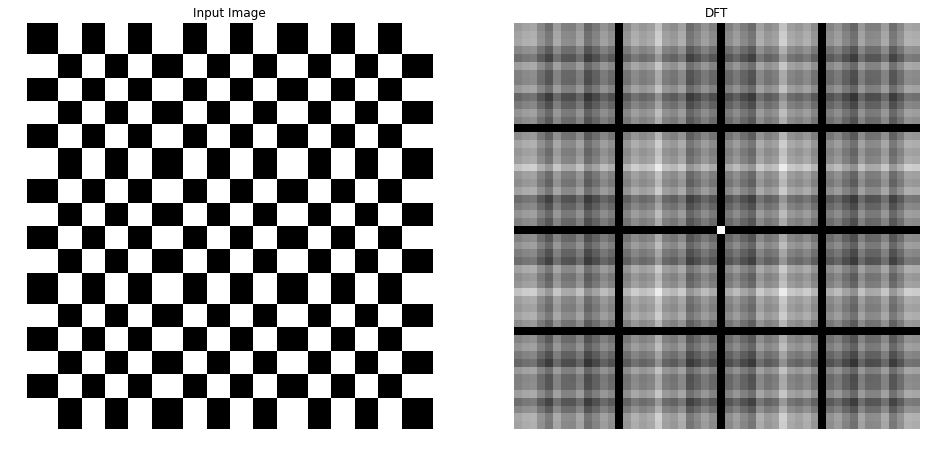

nx:6 ny:6


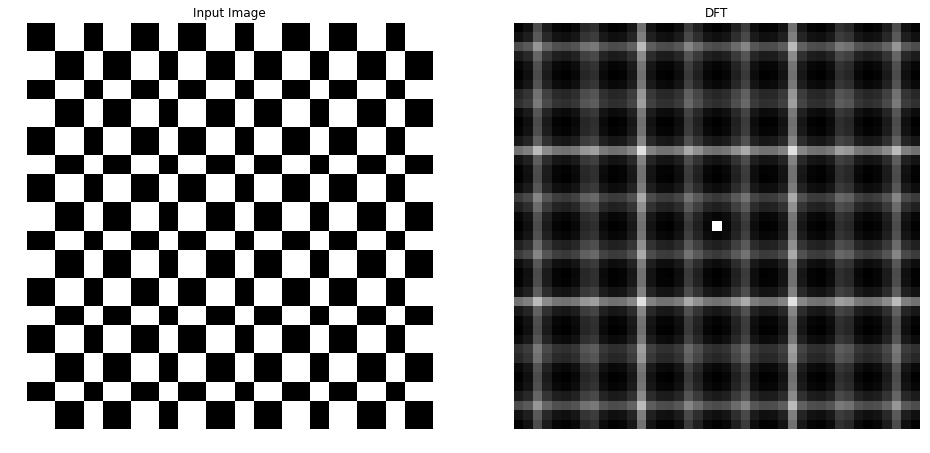

nx:7 ny:7


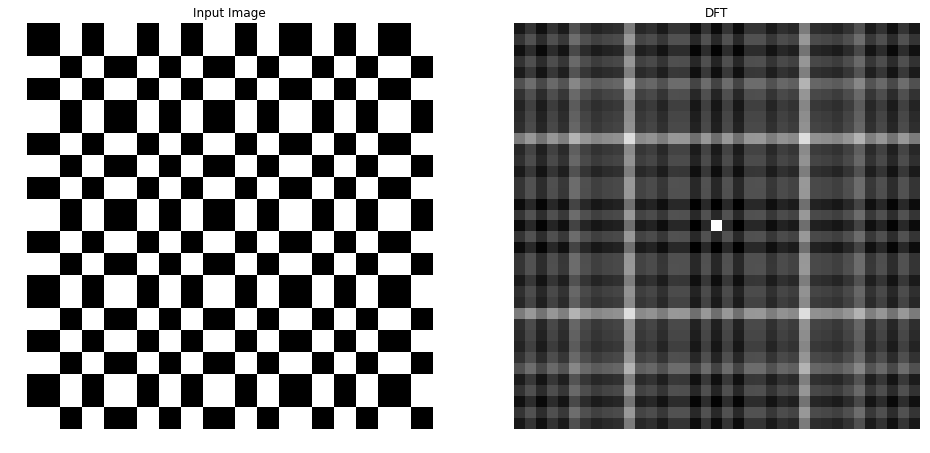

nx:8 ny:8


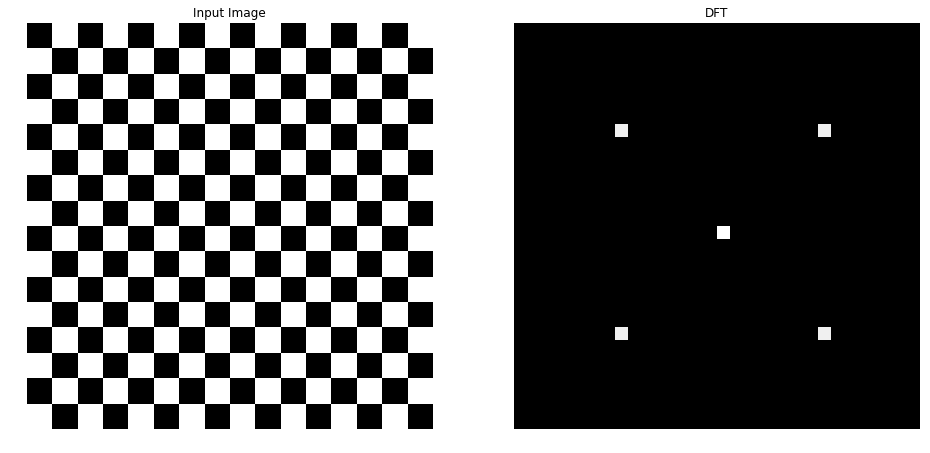

nx:9 ny:9


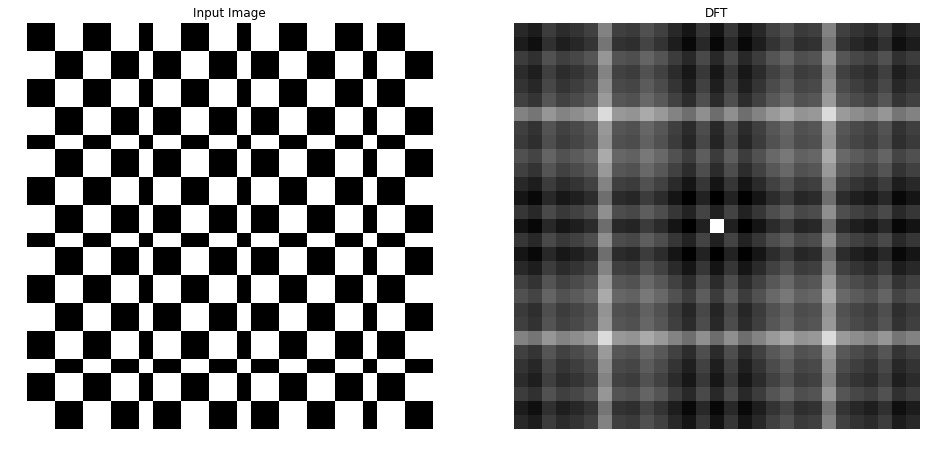

nx:10 ny:10


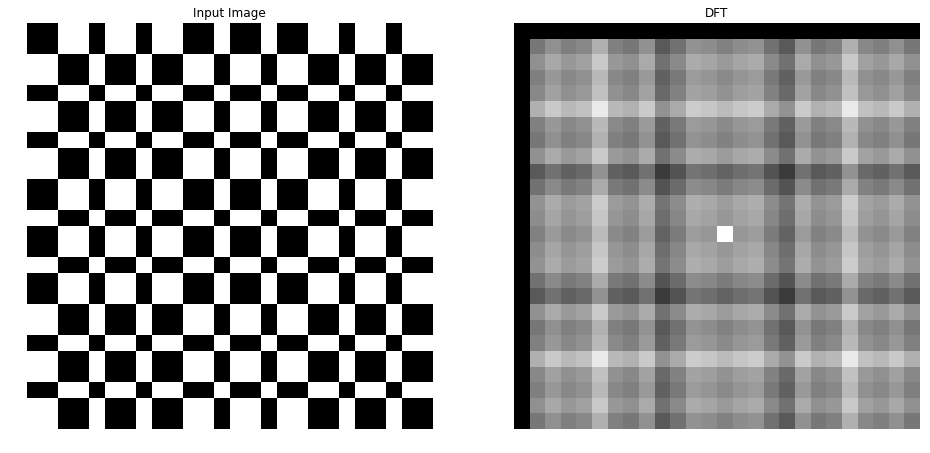

nx:11 ny:11


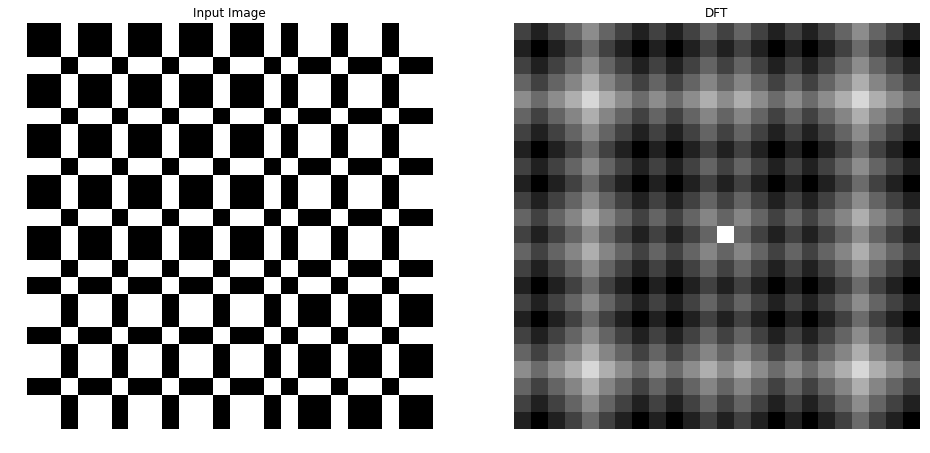

nx:12 ny:12


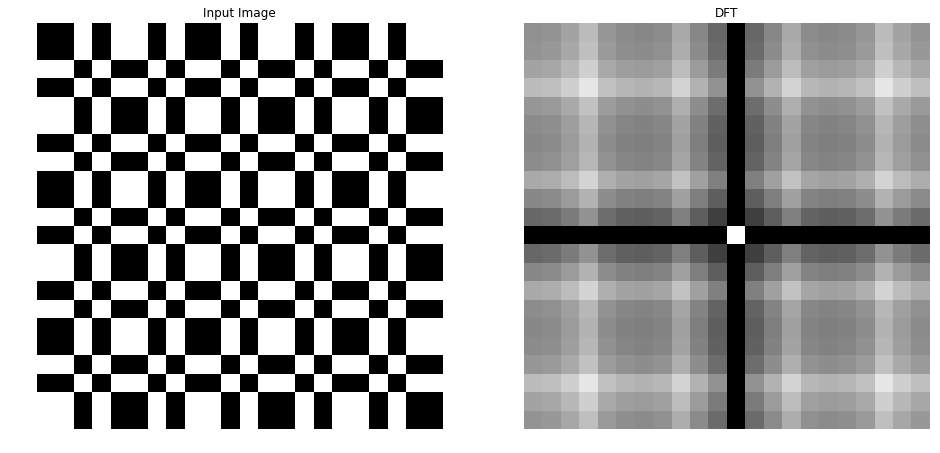

nx:13 ny:13


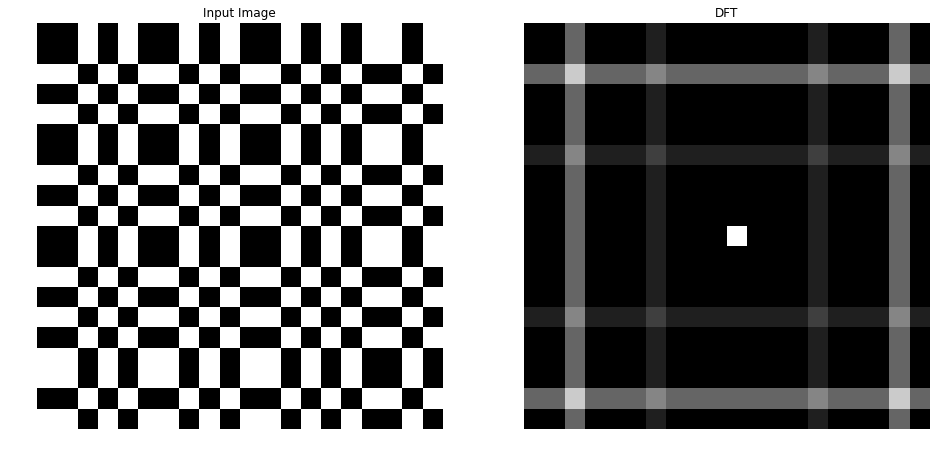

nx:14 ny:14


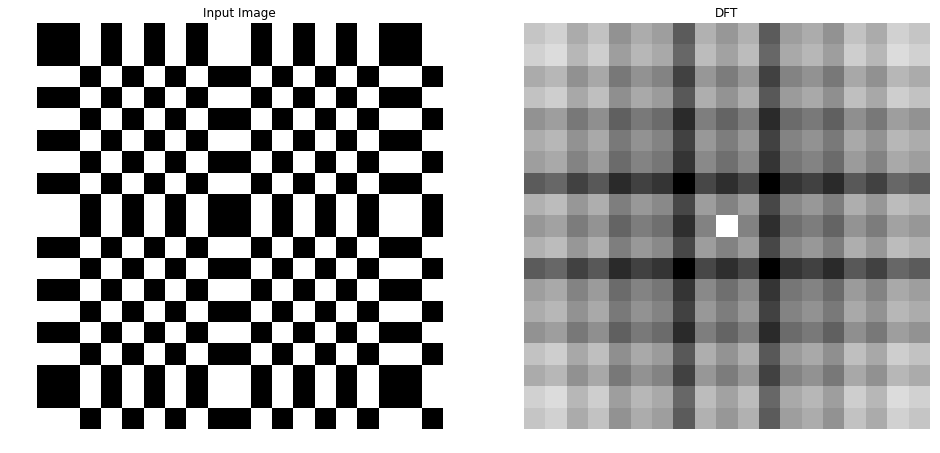

nx:15 ny:15


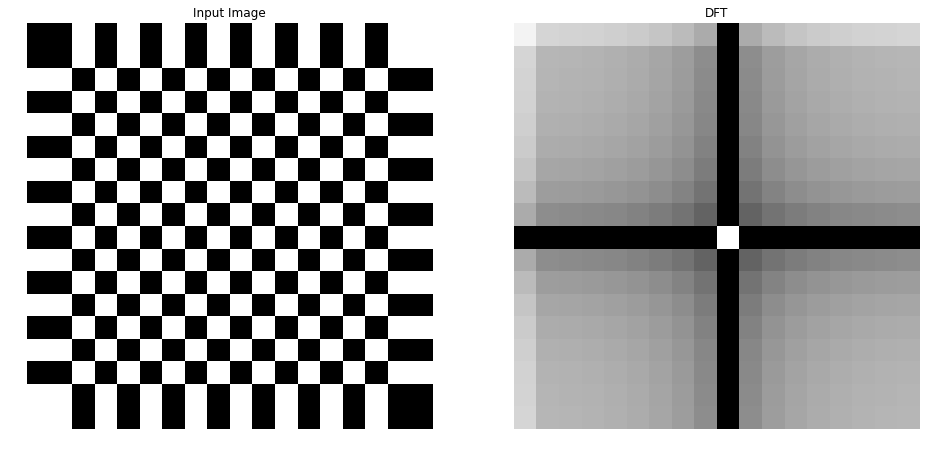

nx:16 ny:16


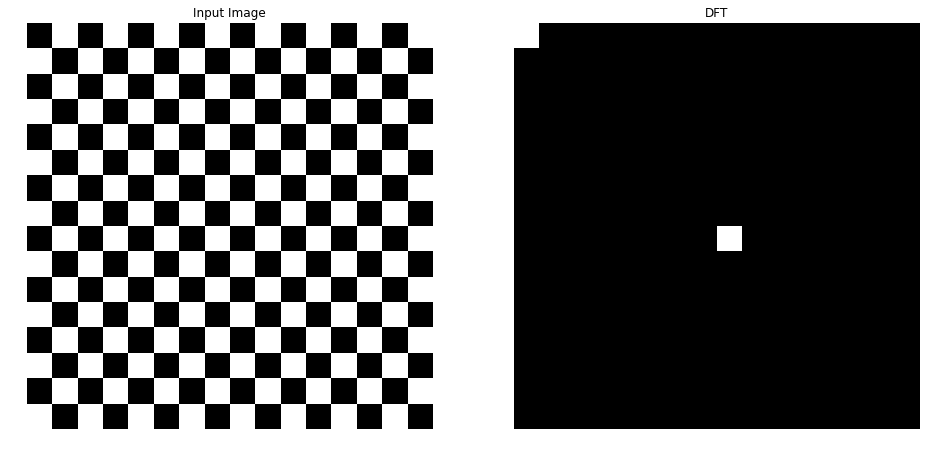

nx:17 ny:17


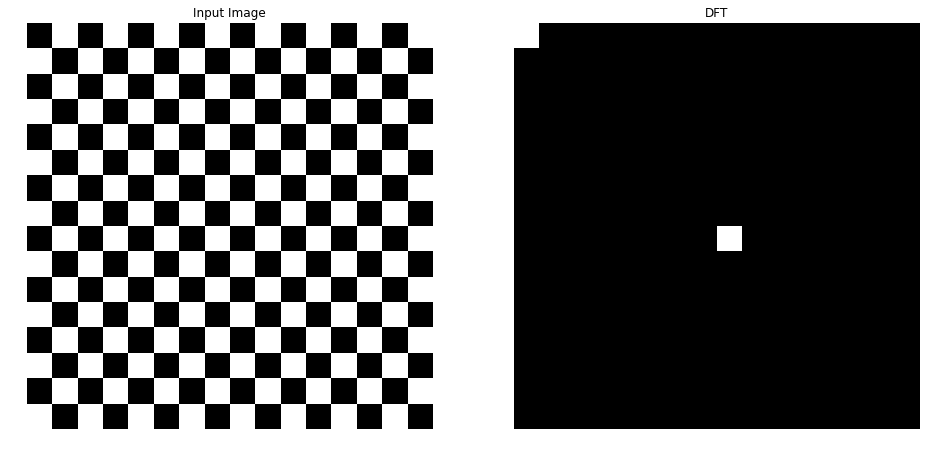

nx:18 ny:18


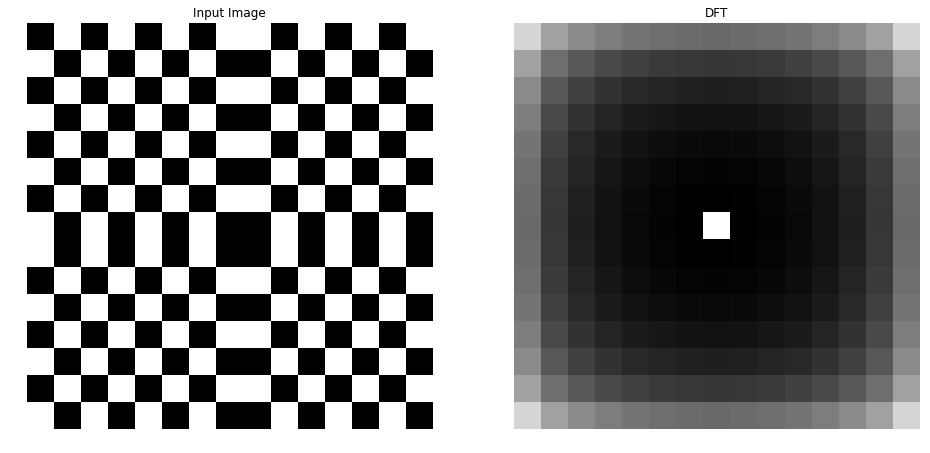

nx:19 ny:19


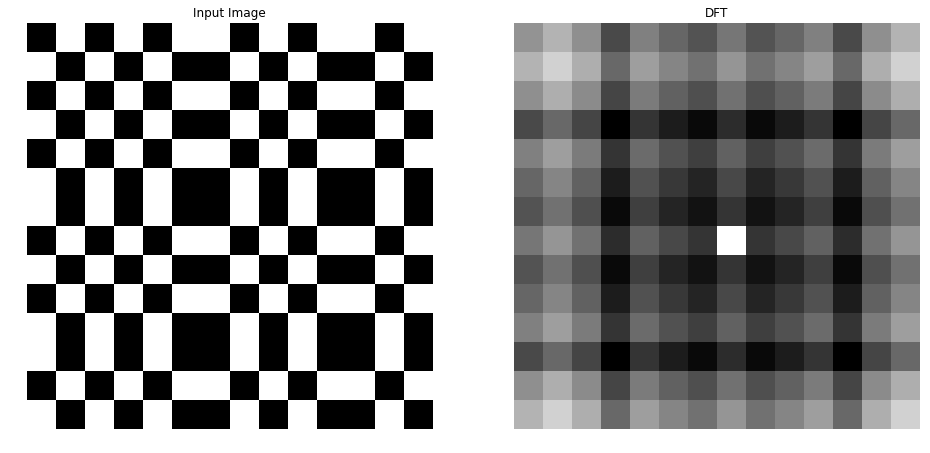

nx:20 ny:20


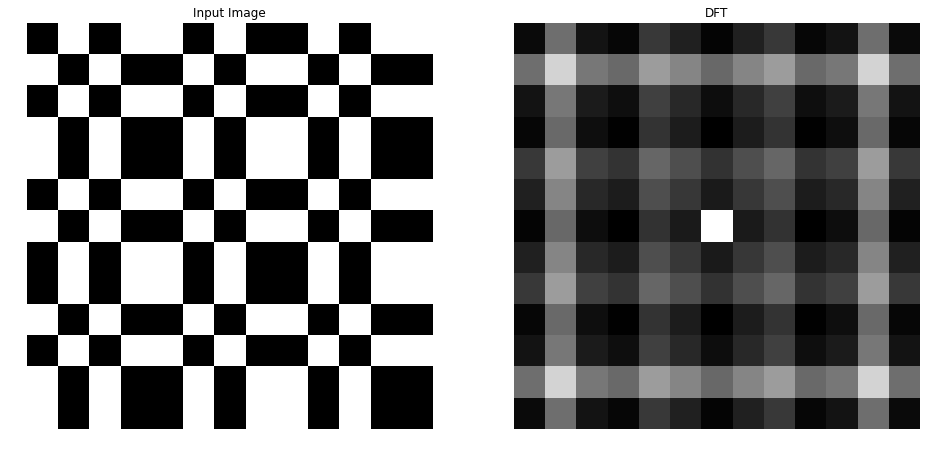

nx:21 ny:21


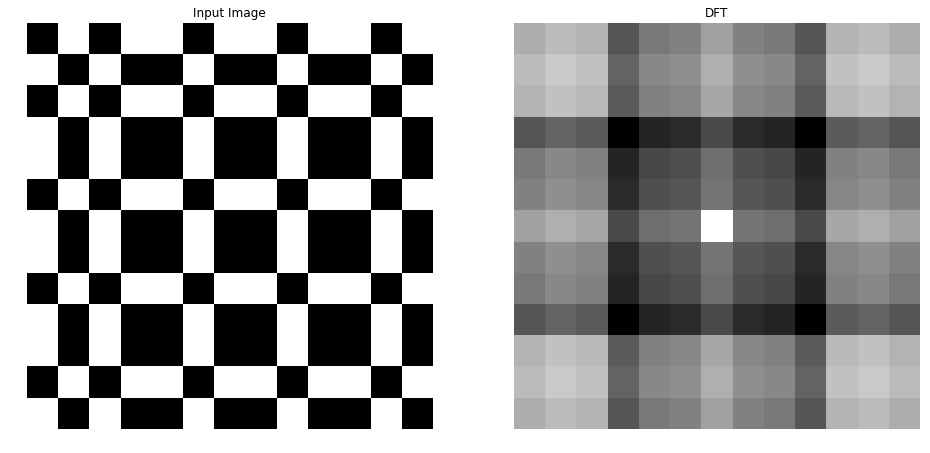

nx:22 ny:22


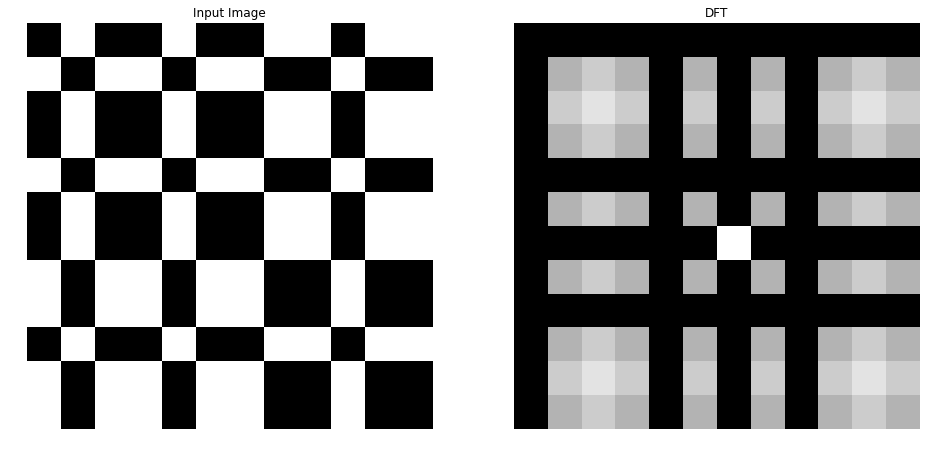

nx:23 ny:23


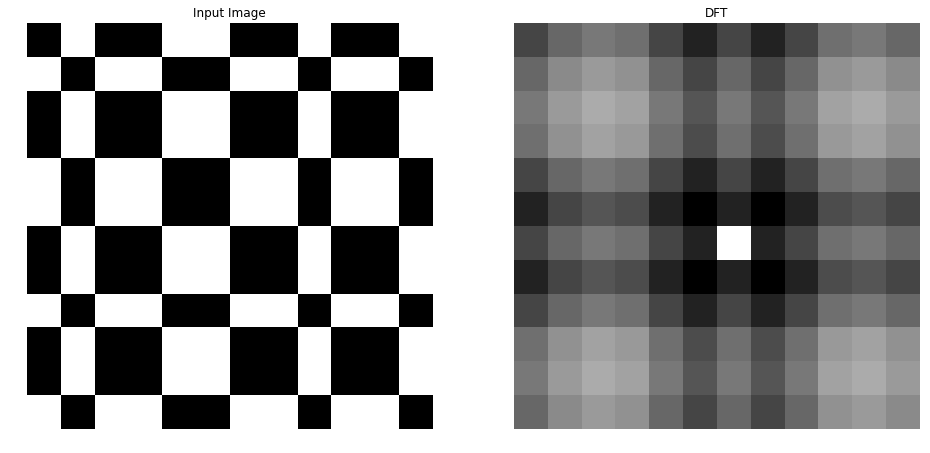

nx:24 ny:24


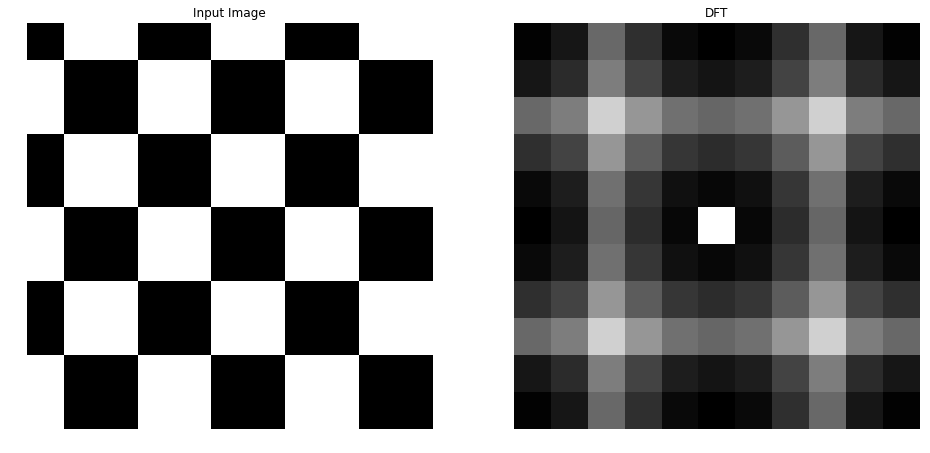

nx:25 ny:25


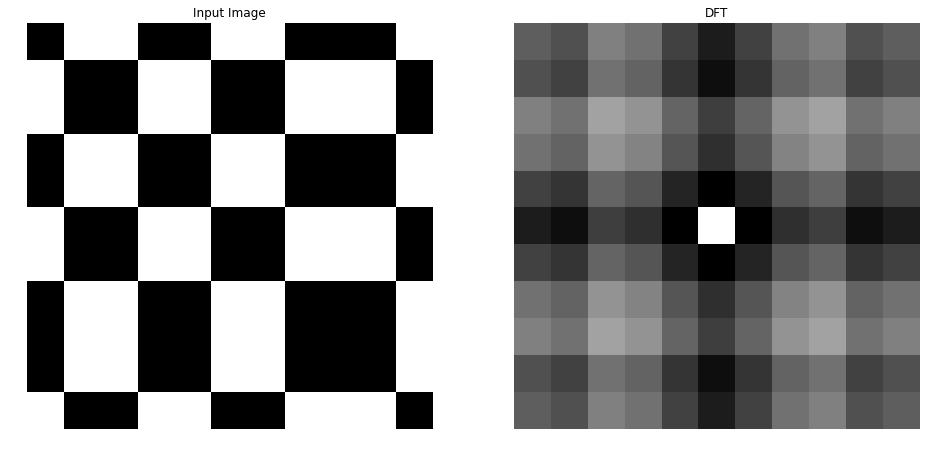

nx:26 ny:26


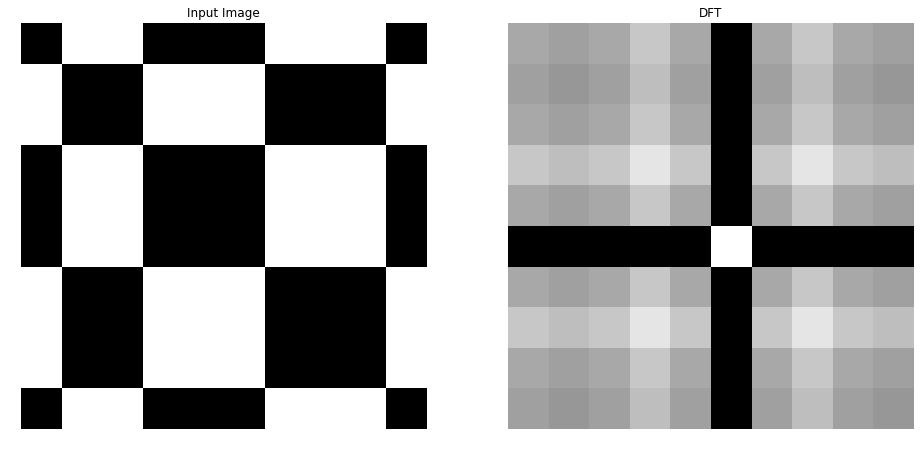

nx:27 ny:27


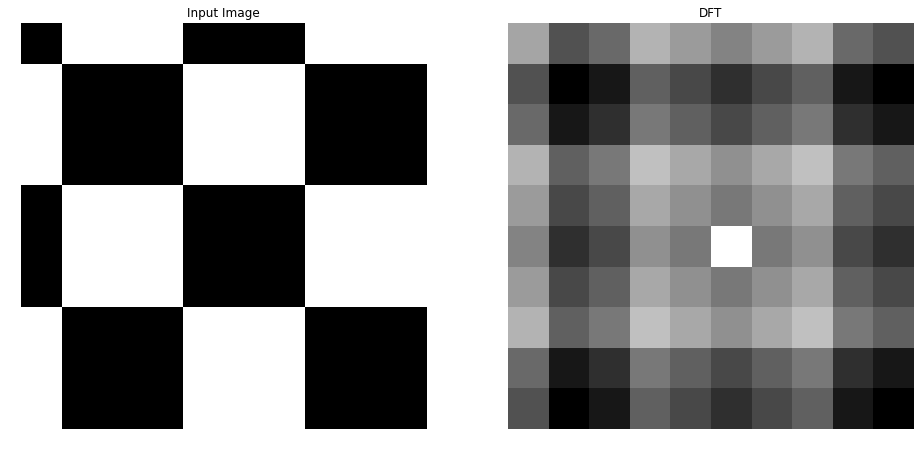

nx:28 ny:28


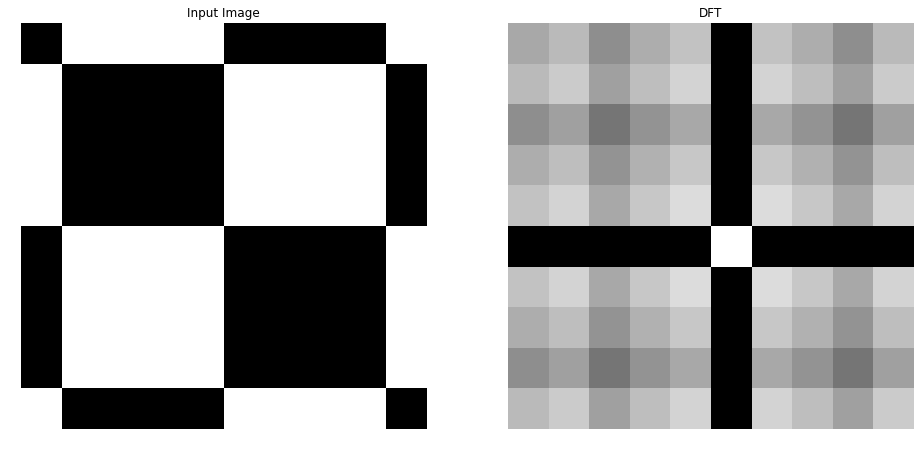

nx:29 ny:29


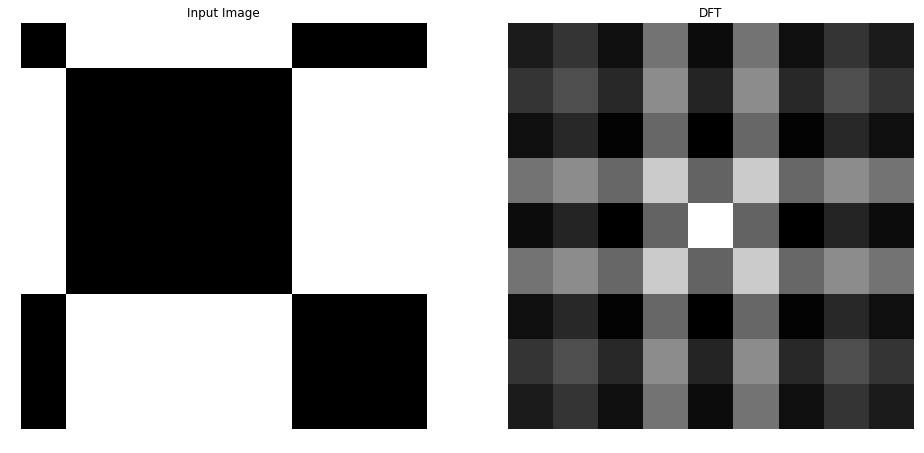

nx:30 ny:30


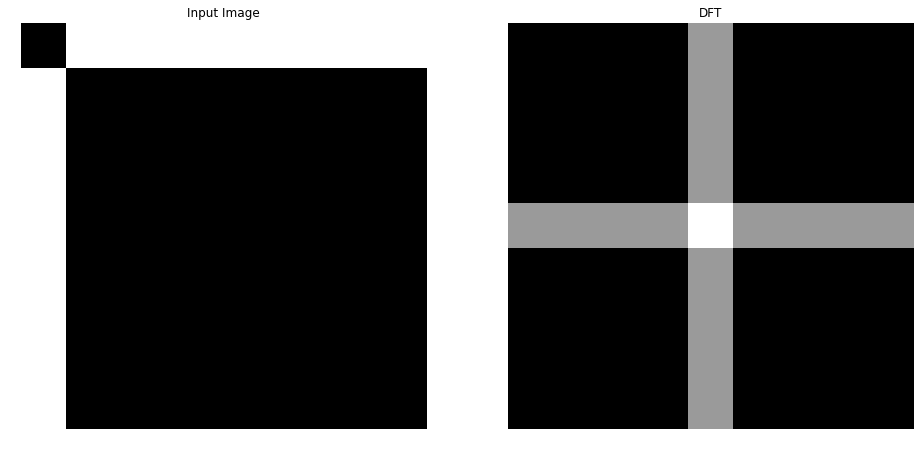

nx:31 ny:31


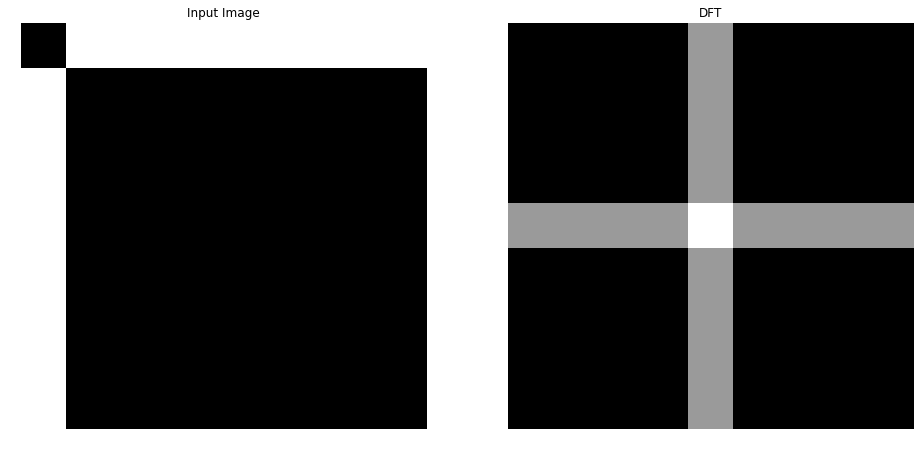

In [67]:
# Show images and their FFT
for i in range(1,32):
    print("nx:{} ny:{}".format(i,i))
    new_im = sample_image(im,i,i)
    f_im = get_fft_img(new_im)
    display_2_images(new_im,f_im,'DFT')

Highest Nx and Ny:
- Case 1: nx = 16 ny = 16 each

Recoverable cases:
 - nx == ny and they both are in powers of 2. 

Thus whenever we get the fft in the form of discontinuous dots scattered around the central dc frequency, in those cases the image is recoverable. If we get continuous lines in the fft then in those cases the recovered image will be distorted